In [14]:
import numpy as np 
import pandas as pd
import torch

# 1. Loading Data

In [15]:
X = pd.read_csv("../Xtrain_hgcGIrA.csv")
X.head()

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096


In [16]:
y = pd.read_csv("../Ytrain_yL5OjS4.csv")
y.head()

,Unnamed: 0,p0q0
0,1,0.216
1,2,0.216
2,3,0.227
3,4,0.229
4,5,0.225


In [17]:
y = y.drop(['Unnamed: 0'], axis=1)

In [18]:
y.head()

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225


In [19]:
y.shape

(31119, 1)

In [20]:
any(X["hour"] == "11:00:00")

True

In [21]:
# shape of the data 
X.shape

(31119, 12)

In [22]:
X.head()

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096


In [23]:
X_test = pd.read_csv("../Xtest.csv")

In [24]:
X = pd.concat([X, X_test], axis=0)
X.reset_index(drop=True, inplace=True)
X

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9,0,BE,08:00:00,2,0.121,0.145,0.15715,0.071,0.095,NaN
44867,2019-07-04,9,0,BE,08:00:00,2,0.144,0.139,0.15300,0.079,0.102,NaN
44868,2019-07-05,9,0,BE,08:00:00,2,0.128,0.137,0.12700,0.072,0.089,NaN
44869,2019-05-28,9,0,BE,08:00:00,2,0.164,0.187,0.15500,0.100,0.130,NaN


# 2. Cleaning and Preparing data

In [25]:
C = True

for i in range(X["composition"].shape[0]):
    if not X["composition"][i] == 2:
        C = False
        break

C

False

In [26]:
D = True

for i in range(X["way"].shape[0]):
    if not X["way"][i] == 0:
        D = False
        break

D

True

In [27]:
X = X.drop( ["way"], axis=1)
X.head()

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096


In [28]:
X["train"].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54, 55,
        6,  7,  8,  9], dtype=int64)

In [29]:
X["station"].unique()

array(['AD', 'AI', 'AJ', 'AK', 'AM', 'AT', 'AW', 'AX', 'BB', 'BD', 'BE',
       'AE', 'AL', 'AO', 'AQ', 'BC', 'AB', 'AN', 'AS', 'BF', 'BG', 'BH',
       'AV', 'AF', 'AP', 'AZ', 'AA', 'AC', 'AG', 'AH', 'AR', 'AU', 'BA',
       'BI', 'BJ', 'AY'], dtype=object)

In [30]:
type(X['date'][1])

str

In [31]:
X.dtypes

date            object
train            int64
station         object
hour            object
composition      int64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
dtype: object

In [32]:
X['station'] = pd.factorize(X['station'])[0]
X["station"] = X['station'].astype(float)

In [33]:
X["station"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [34]:
X["train"] = X["train"].astype(float)
X["composition"] = X["composition"].astype(float)

In [35]:
X.dtypes

date            object
train          float64
station        float64
hour            object
composition    float64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
dtype: object

In [36]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.000000
train          0.000000
station        0.000000
composition    0.000000
p1q0           0.064741
p0q1           0.102561
hour           0.102739
p2q0           0.131265
p3q0           0.197098
p0q2           0.204988
p0q3           0.307281
dtype: float64

In [37]:
mean_by_train1 = X.groupby('train')['p1q0'].mean()
X['p1q0'] = X['p1q0'].fillna(X['train'].map(mean_by_train1))

mean_by_train2 = X.groupby('train')['p2q0'].mean()
X['p2q0'] = X['p2q0'].fillna(X['train'].map(mean_by_train2))

mean_by_train3 = X.groupby('train')['p3q0'].mean()
X['p3q0'] = X['p3q0'].fillna(X['train'].map(mean_by_train3))

mean_by_train4 = X.groupby('train')['p0q1'].mean()
X['p0q1'] = X['p0q1'].fillna(X['train'].map(mean_by_train4))

mean_by_train5 = X.groupby('train')['p0q2'].mean()
X['p0q2'] = X['p0q2'].fillna(X['train'].map(mean_by_train5))

mean_by_train6 = X.groupby('train')['p0q3'].mean()
X['p0q3'] = X['p0q3'].fillna(X['train'].map(mean_by_train6))

X = X.fillna( value = 0)


In [38]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.0
train          0.0
station        0.0
hour           0.0
composition    0.0
p1q0           0.0
p2q0           0.0
p3q0           0.0
p0q1           0.0
p0q2           0.0
p0q3           0.0
dtype: float64

In [39]:
X

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1.0,0.0,06:00:00,2.0,0.127839,0.175699,0.174865,0.201,0.138,0.09100
1,2019-01-08,1.0,0.0,06:00:00,2.0,0.127839,0.175699,0.174865,0.204,0.152,0.10600
2,2019-01-10,1.0,0.0,06:00:00,2.0,0.127839,0.175699,0.174865,0.213,0.153,0.11100
3,2019-01-11,1.0,0.0,06:00:00,2.0,0.127839,0.175699,0.174865,0.213,0.152,0.10800
4,2019-01-14,1.0,0.0,06:00:00,2.0,0.127839,0.175699,0.174865,0.210,0.147,0.09600
...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9.0,10.0,08:00:00,2.0,0.121000,0.145000,0.157150,0.071,0.095,0.24984
44867,2019-07-04,9.0,10.0,08:00:00,2.0,0.144000,0.139000,0.153000,0.079,0.102,0.24984
44868,2019-07-05,9.0,10.0,08:00:00,2.0,0.128000,0.137000,0.127000,0.072,0.089,0.24984
44869,2019-05-28,9.0,10.0,08:00:00,2.0,0.164000,0.187000,0.155000,0.100,0.130,0.24984


# 3. Data cleaning 

In [40]:
# We check how much number 1 we have in the colomn "composition" 
(X["composition"].sum() - X["composition"].shape[0]*2)  

-11.0

In [41]:
# We can delete it now
X.drop(["composition"], axis=1)

,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1.0,0.0,06:00:00,0.127839,0.175699,0.174865,0.201,0.138,0.09100
1,2019-01-08,1.0,0.0,06:00:00,0.127839,0.175699,0.174865,0.204,0.152,0.10600
2,2019-01-10,1.0,0.0,06:00:00,0.127839,0.175699,0.174865,0.213,0.153,0.11100
3,2019-01-11,1.0,0.0,06:00:00,0.127839,0.175699,0.174865,0.213,0.152,0.10800
4,2019-01-14,1.0,0.0,06:00:00,0.127839,0.175699,0.174865,0.210,0.147,0.09600
...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9.0,10.0,08:00:00,0.121000,0.145000,0.157150,0.071,0.095,0.24984
44867,2019-07-04,9.0,10.0,08:00:00,0.144000,0.139000,0.153000,0.079,0.102,0.24984
44868,2019-07-05,9.0,10.0,08:00:00,0.128000,0.137000,0.127000,0.072,0.089,0.24984
44869,2019-05-28,9.0,10.0,08:00:00,0.164000,0.187000,0.155000,0.100,0.130,0.24984


In [42]:
import seaborn as sns

In [43]:
X.dtypes

date            object
train          float64
station        float64
hour            object
composition    float64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
dtype: object

In [44]:
X['hour'] = pd.to_datetime(X['hour'], format="%H:%M:%S", errors='coerce')
X['hour'] = X['hour'].dt.time
X['hour'] = X['hour'].apply(lambda x: x.hour + x.minute * 60 + x.second)


In [45]:
X["hour"].unique()

array([ 6.,  7., nan,  8.,  9., 11.])

In [46]:
X.dtypes

date            object
train          float64
station        float64
hour           float64
composition    float64
p1q0           float64
p2q0           float64
p3q0           float64
p0q1           float64
p0q2           float64
p0q3           float64
dtype: object

In [47]:
print(f"6 : {(X['hour'] == 6 ).sum()}")
print(f"7 : {(X['hour'] == 7 ).sum()}")
print(f"8 : {(X['hour'] == 8 ).sum()}")
print(f"9 : {(X['hour'] == 9 ).sum()}")
print(f"11 : {(X['hour'] == 11 ).sum()}")

6 : 7117
7 : 14647
8 : 14398
9 : 4097
11 : 2


In [48]:
X['hour'] = X['hour'].fillna(8.0)

In [49]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.0
train          0.0
station        0.0
hour           0.0
composition    0.0
p1q0           0.0
p2q0           0.0
p3q0           0.0
p0q1           0.0
p0q2           0.0
p0q3           0.0
dtype: float64

In [50]:
import matplotlib.pyplot as plt

(array([11813., 11410.,  7228.,  5307.,  4819.,  3001.,  1078.,   153.,
           49.,    13.]),
 array([0.    , 0.0934, 0.1868, 0.2802, 0.3736, 0.467 , 0.5604, 0.6538,
        0.7472, 0.8406, 0.934 ]),
 <BarContainer object of 10 artists>)

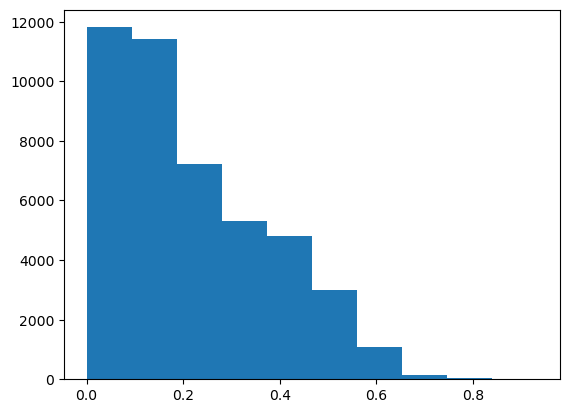

In [51]:
plt.hist(X["p1q0"])

<Axes: xlabel='hour', ylabel='p1q0'>

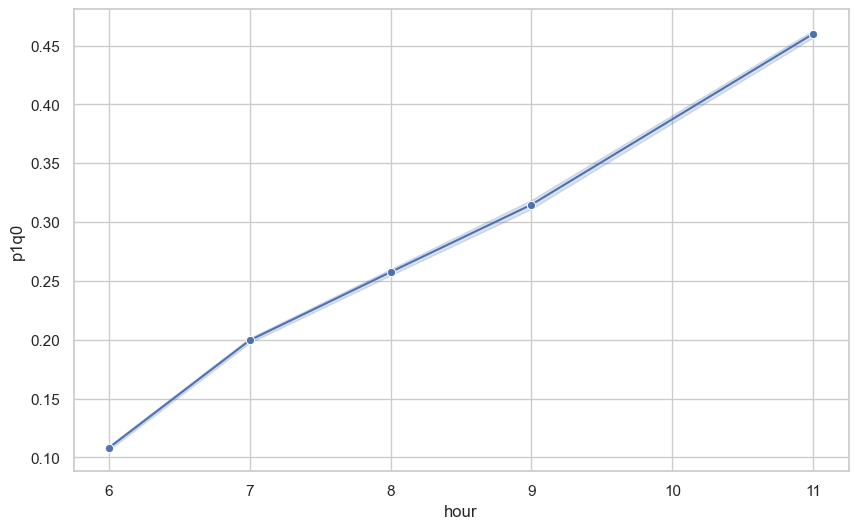

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p1q0', data=X, marker='o', color='b')

In [53]:
(X['hour'] == 11.0).sum()

2

In [54]:
X[X['hour'] == 11]

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
28760,2019-04-09,6.0,2.0,11.0,2.0,0.463,0.539,0.403,0.4154,0.5190,0.4370
29109,2019-04-09,6.0,8.0,11.0,2.0,0.457,0.401,0.532,0.6130,0.5488,0.4836


<Axes: xlabel='hour', ylabel='p2q0'>

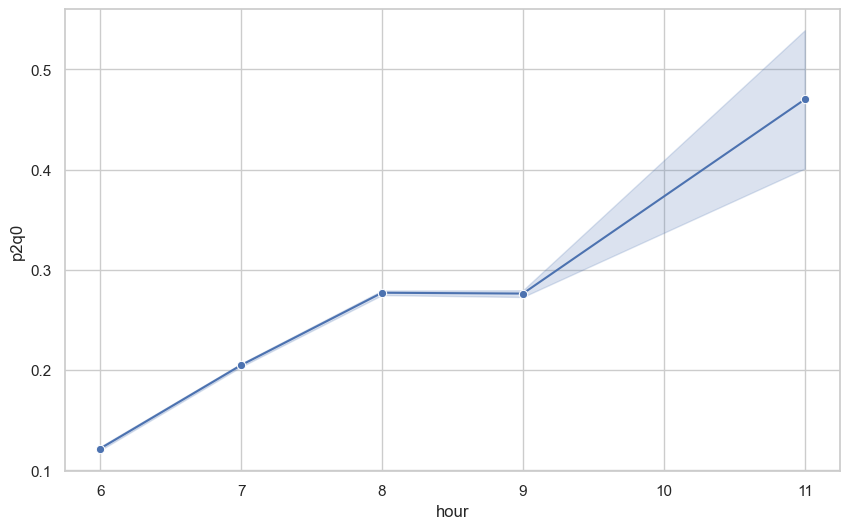

In [55]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p2q0', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p3q0'>

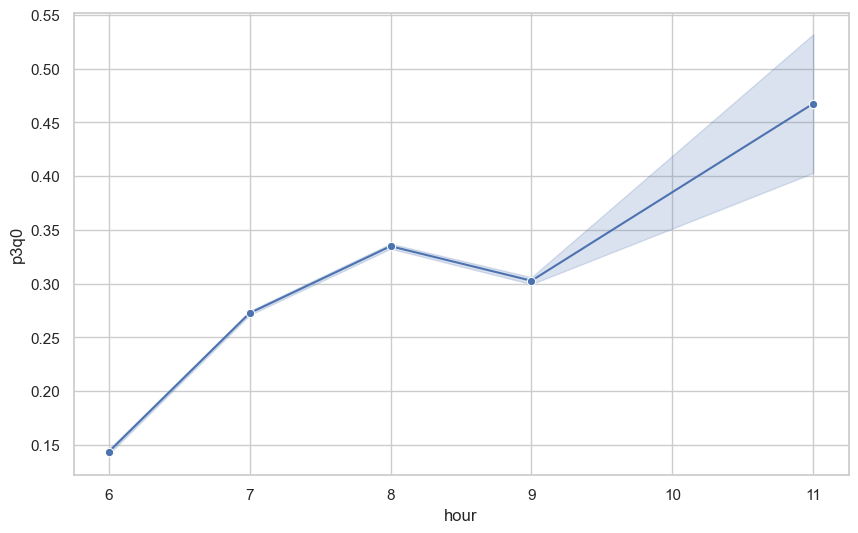

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p3q0', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p0q1'>

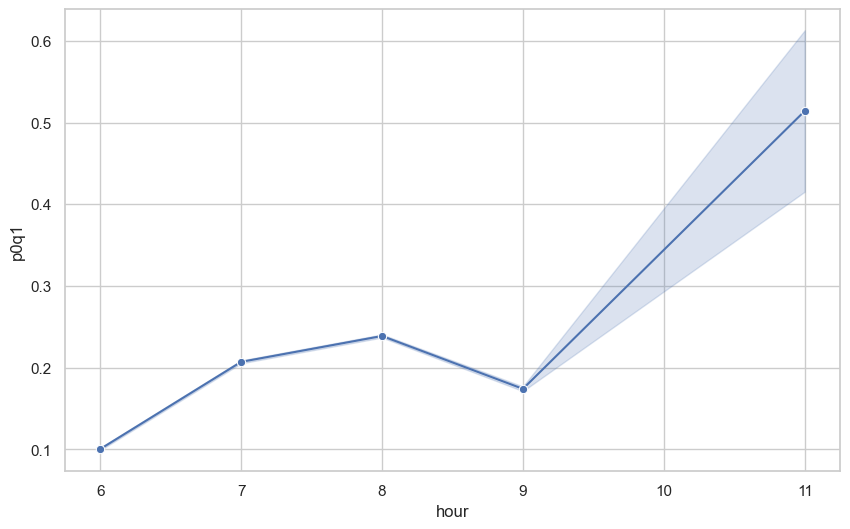

In [57]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p0q1', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p0q2'>

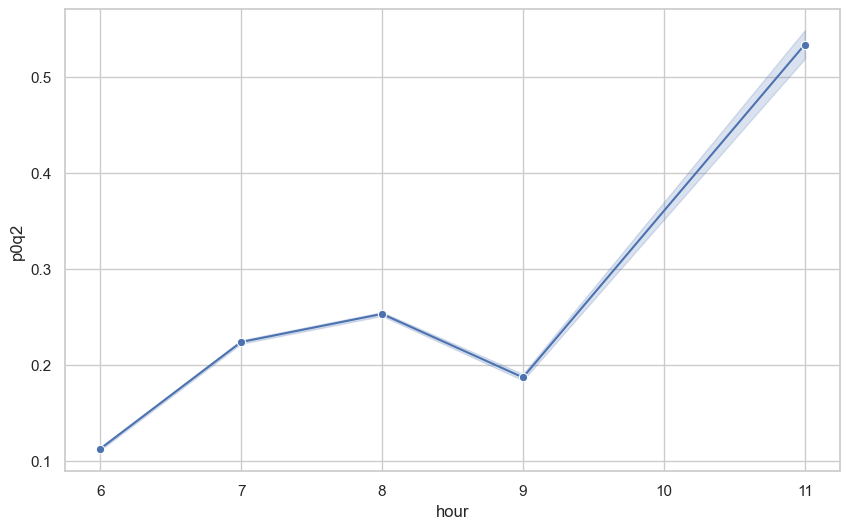

In [58]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p0q2', data=X, marker='o', color='b')

<Axes: xlabel='hour', ylabel='p0q3'>

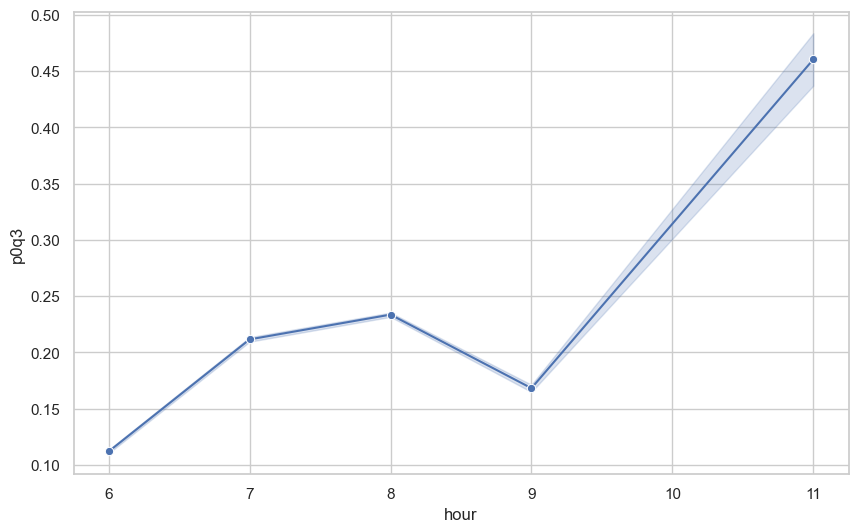

In [59]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='p0q3', data=X, marker='o', color='b')

In [60]:
X

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.201,0.138,0.09100
1,2019-01-08,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.204,0.152,0.10600
2,2019-01-10,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.213,0.153,0.11100
3,2019-01-11,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.213,0.152,0.10800
4,2019-01-14,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.210,0.147,0.09600
...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9.0,10.0,8.0,2.0,0.121000,0.145000,0.157150,0.071,0.095,0.24984
44867,2019-07-04,9.0,10.0,8.0,2.0,0.144000,0.139000,0.153000,0.079,0.102,0.24984
44868,2019-07-05,9.0,10.0,8.0,2.0,0.128000,0.137000,0.127000,0.072,0.089,0.24984
44869,2019-05-28,9.0,10.0,8.0,2.0,0.164000,0.187000,0.155000,0.100,0.130,0.24984


In [61]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.0
train          0.0
station        0.0
hour           0.0
composition    0.0
p1q0           0.0
p2q0           0.0
p3q0           0.0
p0q1           0.0
p0q2           0.0
p0q3           0.0
dtype: float64

In [62]:
X = X.dropna(subset=['hour'])
X.reset_index(drop=True, inplace=True)

In [63]:
(X.isna().sum()/X.shape[0]).sort_values(ascending=True)

date           0.0
train          0.0
station        0.0
hour           0.0
composition    0.0
p1q0           0.0
p2q0           0.0
p3q0           0.0
p0q1           0.0
p0q2           0.0
p0q3           0.0
dtype: float64

In [64]:
X

,date,train,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.201,0.138,0.09100
1,2019-01-08,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.204,0.152,0.10600
2,2019-01-10,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.213,0.153,0.11100
3,2019-01-11,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.213,0.152,0.10800
4,2019-01-14,1.0,0.0,6.0,2.0,0.127839,0.175699,0.174865,0.210,0.147,0.09600
...,...,...,...,...,...,...,...,...,...,...,...
44866,2019-07-03,9.0,10.0,8.0,2.0,0.121000,0.145000,0.157150,0.071,0.095,0.24984
44867,2019-07-04,9.0,10.0,8.0,2.0,0.144000,0.139000,0.153000,0.079,0.102,0.24984
44868,2019-07-05,9.0,10.0,8.0,2.0,0.128000,0.137000,0.127000,0.072,0.089,0.24984
44869,2019-05-28,9.0,10.0,8.0,2.0,0.164000,0.187000,0.155000,0.100,0.130,0.24984


In [65]:
X = X.drop(['date'], axis=1)

In [66]:
X = X.drop(['composition'], axis=1)

In [67]:
X

,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.201,0.138,0.09100
1,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.204,0.152,0.10600
2,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.213,0.153,0.11100
3,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.213,0.152,0.10800
4,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.210,0.147,0.09600
...,...,...,...,...,...,...,...,...,...
44866,9.0,10.0,8.0,0.121000,0.145000,0.157150,0.071,0.095,0.24984
44867,9.0,10.0,8.0,0.144000,0.139000,0.153000,0.079,0.102,0.24984
44868,9.0,10.0,8.0,0.128000,0.137000,0.127000,0.072,0.089,0.24984
44869,9.0,10.0,8.0,0.164000,0.187000,0.155000,0.100,0.130,0.24984


In [68]:
X_train = X.head(31119)
X_test = X.tail(len(X) - 31119)

In [69]:
X_test.reset_index(drop=True, inplace=True)
X_test

,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.226,0.165,0.12800
1,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.221,0.159,0.11400
2,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.227,0.175,0.13300
3,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.200,0.148,0.10500
4,1.0,0.0,6.0,0.127839,0.175699,0.174865,0.221,0.169,0.12600
...,...,...,...,...,...,...,...,...,...
13747,9.0,10.0,8.0,0.121000,0.145000,0.157150,0.071,0.095,0.24984
13748,9.0,10.0,8.0,0.144000,0.139000,0.153000,0.079,0.102,0.24984
13749,9.0,10.0,8.0,0.128000,0.137000,0.127000,0.072,0.089,0.24984
13750,9.0,10.0,8.0,0.164000,0.187000,0.155000,0.100,0.130,0.24984


In [70]:
y

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225
...,...
31114,0.111
31115,0.143
31116,0.139
31117,0.117


# Training Model : 

In [71]:
X_test = X_test.astype(np.float32)
X_train = X_train.astype(np.float32)
y = y.astype(np.float32)

In [72]:
y

,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225
...,...
31114,0.111
31115,0.143
31116,0.139
31117,0.117


In [73]:
X_train = torch.from_numpy(X_train.values)
X_test = torch.from_numpy(X_test.values)
y = torch.from_numpy(y.values).reshape(-1,1)

In [74]:
print("X_train.shape:",X_train.shape)
print("x_test.shape:",X_test.shape)
print("Y_train.shape:",y.shape)

X_train.shape: torch.Size([31119, 9])
x_test.shape: torch.Size([13752, 9])
Y_train.shape: torch.Size([31119, 1])


In [75]:
y

tensor([[0.2160],
        [0.2160],
        [0.2270],
        ...,
        [0.1390],
        [0.1170],
        [0.4160]])

In [86]:
from TF import evaluate_model, train_network

In [87]:
import torch.nn as nn

In [88]:
class LinearR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [89]:
import torch
import numpy as np, pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [90]:
num_epochs = 500
batch_size = 128
loss_function = nn.BCELoss()

In [91]:
weight_decay = 0.0 #set to 0; no L2 Regularizer; passed into the Optimizer
lambda_L1=0.0 #Set to 0; no L1 reg; manually added in loss (train_network)

In [92]:
model = LinearR(9, 1)

In [93]:
adam_optimizer = torch.optim.Adam(model.parameters(), lr= 0.001, weight_decay=weight_decay)

In [94]:
adam_loss = train_network(model, adam_optimizer, loss_function ,num_epochs,batch_size, X_train,y,lambda_L1=0.0)

Epoch: 0 - Loss:0.7428
Epoch: 10 - Loss:0.5282
Epoch: 20 - Loss:0.5160
Epoch: 30 - Loss:0.5127
Epoch: 40 - Loss:0.5119
Epoch: 50 - Loss:0.5115
Epoch: 60 - Loss:0.5113
Epoch: 70 - Loss:0.5110
Epoch: 80 - Loss:0.5109
Epoch: 90 - Loss:0.5107
Epoch: 100 - Loss:0.5106
Epoch: 110 - Loss:0.5105
Epoch: 120 - Loss:0.5104
Epoch: 130 - Loss:0.5104
Epoch: 140 - Loss:0.5103
Epoch: 150 - Loss:0.5103
Epoch: 160 - Loss:0.5102
Epoch: 170 - Loss:0.5102
Epoch: 180 - Loss:0.5102
Epoch: 190 - Loss:0.5102
Epoch: 200 - Loss:0.5101
Epoch: 210 - Loss:0.5101
Epoch: 220 - Loss:0.5101
Epoch: 230 - Loss:0.5101
Epoch: 240 - Loss:0.5101
Epoch: 250 - Loss:0.5101
Epoch: 260 - Loss:0.5101
Epoch: 270 - Loss:0.5101
Epoch: 280 - Loss:0.5101
Epoch: 290 - Loss:0.5101
Epoch: 300 - Loss:0.5100
Epoch: 310 - Loss:0.5100
Epoch: 320 - Loss:0.5100
Epoch: 330 - Loss:0.5100
Epoch: 340 - Loss:0.5100
Epoch: 350 - Loss:0.5100
Epoch: 360 - Loss:0.5100
Epoch: 370 - Loss:0.5100
Epoch: 380 - Loss:0.5100
Epoch: 390 - Loss:0.5100
Epoch: 400 

In [95]:
with torch.no_grad():
    predictions = model(X_test)

print(predictions)

tensor([[0.2339],
        [0.2294],
        [0.2356],
        ...,
        [0.1162],
        [0.1351],
        [0.1214]])


In [96]:
predictions_df = pd.DataFrame({'Predictions': predictions.numpy().flatten()})
predictions_df.index = predictions_df.index + 1
predictions_df.to_csv('predictions_for_torch_model.csv', index=True)